<a 
 href="https://colab.research.google.com/github/LearnPythonWithRune/MachineLearningWithPython/blob/main/colab/final/00 - Project - k-Nearest-Neighbor Classifier (KNN).ipynb"
 target="_parent">
<img 
 src="https://colab.research.google.com/assets/colab-badge.svg"
alt="Open In Colab"/>
</a>

# Project - $k$-Nearest-Neighbors Classifier
- Create a $k$-Nearest-Neighbors Classifier supporting 3 dimensions
- Investigate whether it performs better

### Step 1: Import libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

### Step 2: Read data
- Use pandas [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) method to read **files/weather.csv**
- HINT: Use **parse_dates=True** and **index_col=0**

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/LearnPythonWithRune/MachineLearningWithPython/main/jupyter/final/files/weather.csv', parse_dates=True, index_col=0)
data.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
Date                                                                        
2008-02-01     19.5     22.4      15.6          6.2       0.0         NaN   
2008-02-02     19.5     25.6       6.0          3.4       2.7         NaN   
2008-02-03     21.6     24.5       6.6          2.4       0.1         NaN   
2008-02-04     20.2     22.8      18.8          2.2       0.0         NaN   
2008-02-05     19.7     25.7      77.4          NaN       0.0         NaN   

            WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  \
Date                                                           ...   
2008-02-01            NaN          S        SSW          17.0  ...   
2008-02-02            NaN          W          E           9.0  ...   
2008-02-03            NaN        ESE        ESE          17.0  ...   
2008-02-04            NaN        NNE          E          22.0  ...   
2008-02-05            NaN        NNE          W          11.0  ...   

            Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
Date                                                                    
2008-02-01         84.0       1017.6       1017.4       8.0       8.0   
2008-02-02         73.0       1017.9       1016.4       7.0       7.0   
2008-02-03         86.0       1016.7       1015.6       7.0       8.0   
2008-02-04         90.0       1014.2       1011.8       8.0       8.0   
2008-02-05         74.0       1008.3       1004.8       8.0       8.0   

            Temp9am  Temp3pm  RainToday  RISK_MM RainTomorrow  
Date                                                           
2008-02-01     20.7     20.9        Yes      6.0          Yes  
2008-02-02     22.4     24.8        Yes      6.6          Yes  
2008-02-03     23.5     23.0        Yes     18.8          Yes  
2008-02-04     21.4     20.9        Yes     77.4          Yes  
2008-02-05     22.5     25.5        Yes      1.6          Yes  

[5 rows x 22 columns]

In [ ]:
data = data.drop(["WindGustDir","WindDir9am","WindDir3pm","Cloud9am","Cloud3pm"], axis=1)

### Step 3: Investigate data types
- Use [dtypes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html)
- The goal is to identify all columns with datatype **float64** for next step

In [ ]:
data = data.drop(["RainToday"], axis=1)
data.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustSpeed    float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Temp9am          float64
Temp3pm          float64
RISK_MM          float64
RainTomorrow      object
dtype: object

In [ ]:
data = data.drop(["WindGustSpeed"], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3337 entries, 2008-02-01 to 2017-06-25
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MinTemp       3334 non-null   float64
 1   MaxTemp       3335 non-null   float64
 2   Rainfall      3331 non-null   float64
 3   Evaporation   3286 non-null   float64
 4   Sunshine      3321 non-null   float64
 5   WindSpeed9am  3311 non-null   float64
 6   WindSpeed3pm  3312 non-null   float64
 7   Humidity9am   3323 non-null   float64
 8   Humidity3pm   3324 non-null   float64
 9   Pressure9am   3317 non-null   float64
 10  Pressure3pm   3318 non-null   float64
 11  Temp9am       3333 non-null   float64
 12  Temp3pm       3333 non-null   float64
 13  RISK_MM       3337 non-null   float64
 14  RainTomorrow  3337 non-null   object 
dtypes: float64(14), object(1)
memory usage: 417.1+ KB


### Step 4: Choose 3 columns to create datasets
- Use **Humidity3pm** and **Pressure3pm** together with another column to predict **RainTomorrow**
- Make a list of three column names **'Humidity3pm', 'Pressure3pm', INSERT YOUR CHOICE** (should be one with dtype *float64*, e.g., **Cloud3pm**), and **'RainTomorrow'**
- Create the dataset consisting of these 4 columns

In [ ]:
dataset_clean = data.dropna()
len(data), len(dataset_clean)

(3337, 3187)

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")

### Step 5: Deal with remaining missing data
- A simple choice is to simply remove rows with missing data
- Use [dropna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)

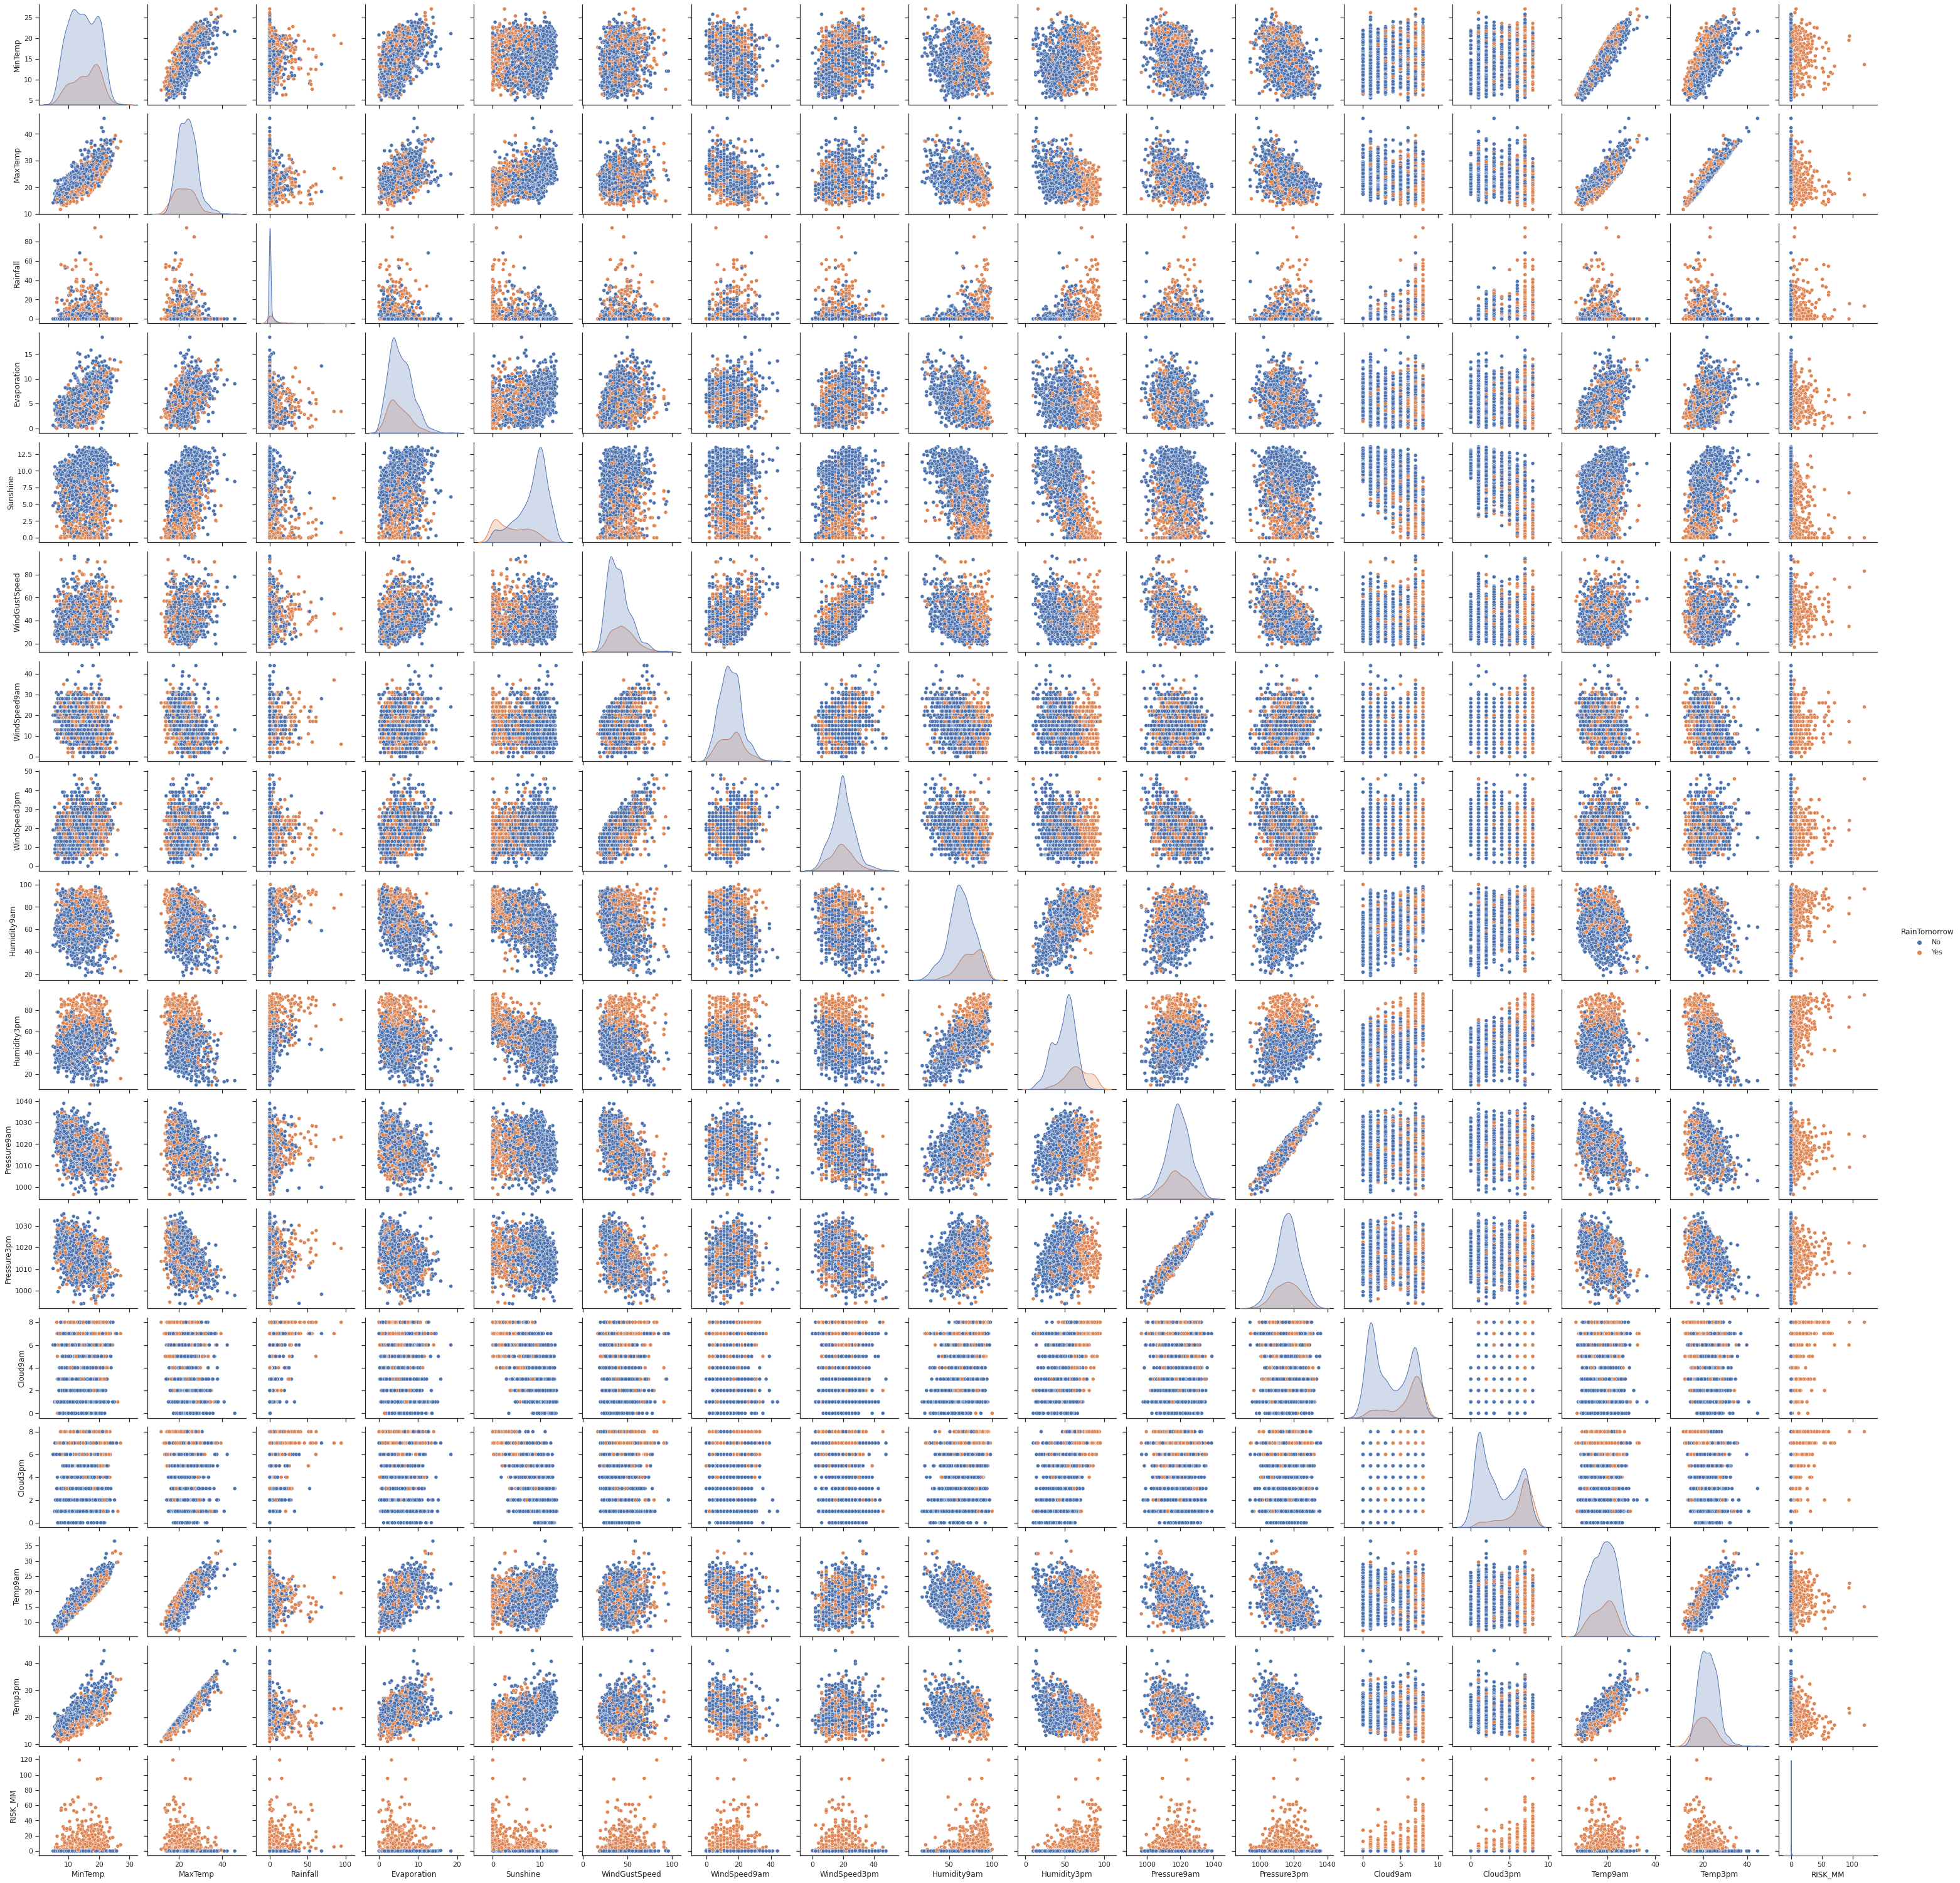

In [ ]:
sns.pairplot(dataset_clean, hue="RainTomorrow")

In [ ]:
X = dataset_clean[['Humidity3pm', 'Sunshine', 'Rainfall', 'RISK_MM', 'Temp3pm','Temp9am']]
y = dataset_clean['RainTomorrow']
y = np.array([0 if value == 'No' else 1 for value in y])

### Step 6: Create training and test datasets
- Define dataset **X** to be the data consisting of the three columns.
- Define dataset **y** to be datset cosisting of **'RainTomorrow'**.
    - HINT: Use list comprehension to transform **'No'** and **'Yes'** to 0 and 1, repectively (like in the Lesson)
- Divide into **X_train, X_test, y_train, y_test** with **train_test_split**
    - HINT: See how it is done in Lesson
    - You can use **random_state=42** (or any other number) if you want to reproduce results.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Applying KNN

In [ ]:
from sklearn.metrics import accuracy_score
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
accuracy_score(y_test, y_pred)

0.9360100376411543

In [ ]:
X = dataset_clean[['RISK_MM']]
y = dataset_clean['RainTomorrow']
y = np.array([0 if value == 'No' else 1 for value in y])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

#Applying Perceptron (Linear Classifier)

In [ ]:
from sklearn.linear_model import Perceptron

In [ ]:
#X = dataset_clean[dataset_clean.columns[:-1]]
X = dataset_clean[['Humidity3pm', 'Sunshine', 'Rainfall', 'RISK_MM', 'Temp3pm','Temp9am']]
y = dataset_clean['RainTomorrow']
y = np.array([0 if value == 'No' else 1 for value in y])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
clf = Perceptron(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9799247176913425

### Step 7: Train and test the model
- Create classifier with **KNeighborsClassifier**
    - You can play around with n_neighbors (default =5)
- Fit the model with training data **(X_train, y_train**)
- Predict data from **X_test** (use predict) and assign to **y_pred**.
- Evalute score by using **metrics.accuracy_score(y_test, y_pred)**.

In [ ]:
data.isnull().sum()

MinTemp             3
MaxTemp             2
Rainfall            6
Evaporation        51
Sunshine           16
WindGustSpeed    1036
WindSpeed9am       26
WindSpeed3pm       25
Humidity9am        14
Humidity3pm        13
Pressure9am        20
Pressure3pm        19
Cloud9am          566
Cloud3pm          561
Temp9am             4
Temp3pm             4
RainToday           6
RISK_MM             0
RainTomorrow        0
dtype: int64

### Step 8 (Optional): Try with different columns
- You can redo with diffrent choise of columns (starting from step 4)

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

WindSpeed9am  Pressure9am  Cloud9am RainTomorrow
Date                                                        
2008-02-01          17.0       1017.6       8.0          Yes
2008-02-02           9.0       1017.9       7.0          Yes
2008-02-03          17.0       1016.7       7.0          Yes
2008-02-04          22.0       1014.2       8.0          Yes
2008-02-05          11.0       1008.3       8.0          Yes

(3337, 1690)

0.7163120567375887